### 1. Use sdu_reg.xlsx file for this assignment. 
Select any 5 following formats then compare in plots their Read speed, Write speed and File sizes

CSV, JSON, HTML, HDF5 Format, Feather Format, Parquet Format, Msgpack, Python Pickle Format, SQL

#### Writing

In [79]:
import pandas as pd
import os
import time

In [85]:
#creating list of time that files consume while writing 
writing_time = {}
file =  pd.DataFrame(pd.read_excel("sdu-reg.xlsx"))

In [86]:
##csv 
start_csv = time.time()
csvF = file.to_csv("csv_file")
time_csv = time.time() - start_csv
writing_time["csv"] = time_csv

##json
start_json = time.time()
jsonF = file.to_json("json_file")
time_json = time.time() - start_json
writing_time["json"] = time_json


In [87]:
##Parquet Format
start_prq = time.time()
parq = file.to_parquet("prq")
time_prq = time.time() - start_prq
writing_time["parquet"] = time_prq

In [88]:
##html format
start_html = time.time()
html = file.to_html("html_file")
time_html = time.time() - start_html
writing_time["html"] = time_html

In [89]:
##feather
start_f = time.time()
feather = file.to_feather("feather_file")
time_f = time.time() - start_f
writing_time["feather"] = time_f

In [90]:
print(writing_time)

{'csv': 0.07686543464660645, 'json': 0.028039932250976562, 'parquet': 0.03623390197753906, 'html': 2.1874639987945557, 'feather': 0.02433466911315918}


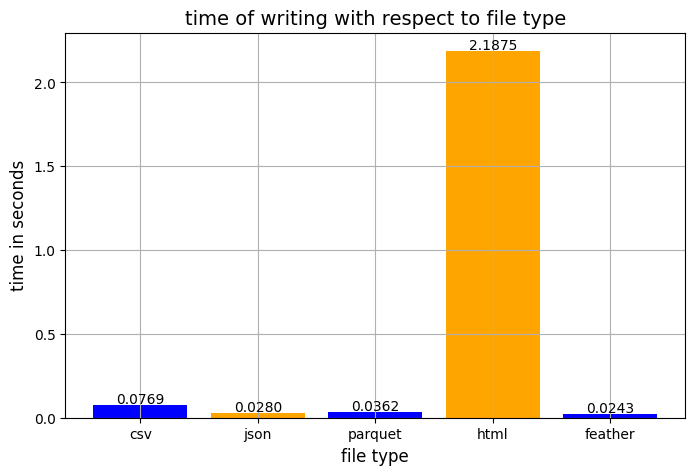

In [103]:
import matplotlib.pyplot as plt

file_types = list(writing_time.keys())
times = list(writing_time.values())

plt.figure(figsize=(8, 5))
plt.bar(file_types, times, color=['blue', 'orange'])

plt.grid(True)

plt.xlabel('file type', fontsize=12)
plt.ylabel('time in seconds', fontsize=12)
plt.title('time of writing with respect to file type', fontsize=14)

for i, h in enumerate(times):
    plt.text(i, h + 0.01, f"{h:.4f}", ha='center', fontsize=10)

plt.show()


#### Reading

In [83]:
read = {}

In [93]:
##csv 
start_csv = time.time()
csvF = pd.read_csv("csv_file")
t_csv = time.time() - start_csv
read["csv"] = t_csv

##json
start_json = time.time()
jsonF = pd.read_json("json_file")
t_json = time.time() - start_json
read["json"] = t_json

In [94]:
##Parquet Format
start_prq = time.time()
parq = pd.read_parquet("prq")
t_prq = time.time() - start_prq
read["parquet"] = t_prq

In [96]:
##html format
start_html = time.time()
html = pd.read_html("html_file")
t_html = time.time() - start_html
read["html"] = t_html

In [97]:
##feather
start_f = time.time()
feather = pd.read_feather("feather_file")
t_f = time.time() - start_f
read["feather"] = t_f

In [100]:
read

{'csv': 0.018381595611572266,
 'json': 0.1256575584411621,
 'parquet': 0.09402155876159668,
 'html': 2.1960785388946533,
 'feather': 0.009285926818847656}

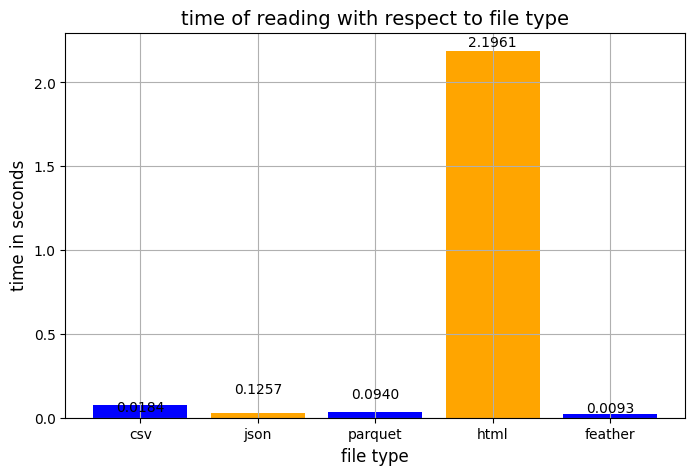

In [110]:
import matplotlib.pyplot as plt

file_types_read = list(read.keys())
times_read = list(read.values())

plt.figure(figsize=(8, 5))
plt.bar(file_types_read, times, color=['blue', 'orange'])

plt.grid(True)

plt.xlabel('file type', fontsize=12)
plt.ylabel('time in seconds', fontsize=12)
plt.title('time of reading with respect to file type', fontsize=14)

for i, h in enumerate(times_read):
    plt.text(i, h + 0.02, f"{h:.4f}", ha='center', fontsize=10)

plt.show()


### 2. Use sqlite database to read data from “Pitchfork” music-centric online magazine.
Extract, Transform and Load data to pitchfork.sqlite database you can also create CSV files, and answer to the following questions:
1. Do review scores for individual artists generally improve over time, or go down?
2. How has Pitchfork's review genre selection changed over time?
3. Who are the most highly rated artists? The least highly rated artists?

In [186]:
import sqlite3 as sql

connection = sql.connect("database.sqlite")

In [206]:
tb = []
connection = sql.connect('database.sqlite')

cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("tables inside:")
for table in tables:
    print(table[0])
    tb.append(table[0])



tables inside:
reviews
artists
genres
labels
years
content


In [2]:
# cursor.execute("Select * from reviews")
# for row in cursor.execute('Select * from reviews'):
#     print(row)

In [209]:
tb

['reviews', 'artists', 'genres', 'labels', 'years', 'content']

In [214]:
reviews = pd.read_sql_query("SELECT * from reviews", connection)
artists = pd.read_sql_query("SELECT * from artists", connection)
genres = pd.read_sql_query("SELECT * from genres", connection)
labels = pd.read_sql_query("SELECT * from labels", connection)
years = pd.read_sql_query("SELECT * from years", connection)
content = pd.read_sql_query("SELECT * from content", connection)

In [1]:
##Do review scores for individual artists generally improve over time, or go down?
reviews.columns
##seems like i need to make tow tables join

NameError: name 'reviews' is not defined

In [ ]:
##How has Pitchfork's review genre selection changed over time?


In [ ]:
##Who are the most highly rated artists? The least highly rated artists?

### 3. Use sdu_reg.xlsx file for this task.
Read the file into pandas DataFrame and solve following problems:
1. Find number of students in each year and level of education 
2. display courses where registered more than average course registration count
3. List all instructors who are going to submit more than 200 grades for each exam.
4. Plot a counts of courses for each educational program.

In [111]:
reg = file.copy()
reg.head(5)

,№,YEAR,TERM,EDU_LEVEL,CIPHER,PROG_CODE,SPECIALITY,EDU_LANG,CLASS,TYPE,STUD_ID,DERS_KOD,COURSE_TITLE,CREDITS,ECTS,SECTION,TEACHER
0,1,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1812,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
1,2,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1348,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
2,3,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1331,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
3,4,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1817,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
4,5,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1813,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova


In [112]:
reg.columns

Index(['№', 'YEAR', 'TERM', 'EDU_LEVEL', 'CIPHER', 'PROG_CODE', 'SPECIALITY',
       'EDU_LANG', 'CLASS', 'TYPE', 'STUD_ID', 'DERS_KOD', 'COURSE_TITLE',
       'CREDITS', 'ECTS', 'SECTION', 'TEACHER'],
      dtype='object')

In [113]:
##Find number of students in each year and level of education
students = reg.groupby(['YEAR', 'EDU_LEVEL']).size().reset_index(name='number_of_students')
students

,YEAR,EDU_LEVEL,number_of_students
0,2019,B,12824
1,2019,DR,64
2,2019,M,453


In [120]:
##display courses where registered more than average course registration count
courses = reg['COURSE_TITLE'].value_counts().reset_index(name="num of students")
avg = courses['num of students'].mean()
more_than_avg = courses[courses['num of students']> avg]
more_than_avg

,COURSE_TITLE,num of students
0,Physical Education 3,646
1,Probability and Mathematical Statictics,588
2,Mathematics for Computer Science 1,588
3,Linear Algebra,586
4,Fundamentals of Programming,571
5,Physical Education 1,568
6,Turkish Language 3 (А2 level),540
7,Turkish Language 1 (А1 level),463
8,Introduction to Algorithms,437
9,Physics 1,368


In [125]:
##List all instructors who are going to submit more than 200 grades for each exam
instructors = reg.groupby(['TEACHER','COURSE_TITLE']).size().reset_index(name="num of students")
instructors = instructors[instructors['num of students']> 200]
instructors

,TEACHER,COURSE_TITLE,num of students
3,Aisha Yershigeshova,Linear Algebra,255
11,Azamat Ordabekov,Introduction to Algorithms,237
23,Candidate of Science Zeine Orazbekova,Professional Russian Language,275
32,Darkhan Orynbassarov,Law,223
34,Dauren Ayazbayev,Web programming: front end,288
92,Nursultan Doszhan,Electronics,266
120,PhD Gaukhar Arepova,Probability and Mathematical Statictics,279
129,PhD Lyazat Naizabayeva,Database Management Systems 1,277
139,PhD Shynar Auyelbekova,Turkish Language 3 (А2 level),307
145,Satbek Abdyldayev,Fundamentals of Programming,382


In [131]:
##Plot a counts of courses for each educational program.
edu = reg.groupby('SPECIALITY')['COURSE_TITLE'].nunique().reset_index(name='COURSE_COUNT')
edu

,SPECIALITY,COURSE_COUNT
0,Computer Science,80
1,Data Science,4
2,Information Systems,54
3,Mathematical and Computer Modeling,9
4,Mathematics,39


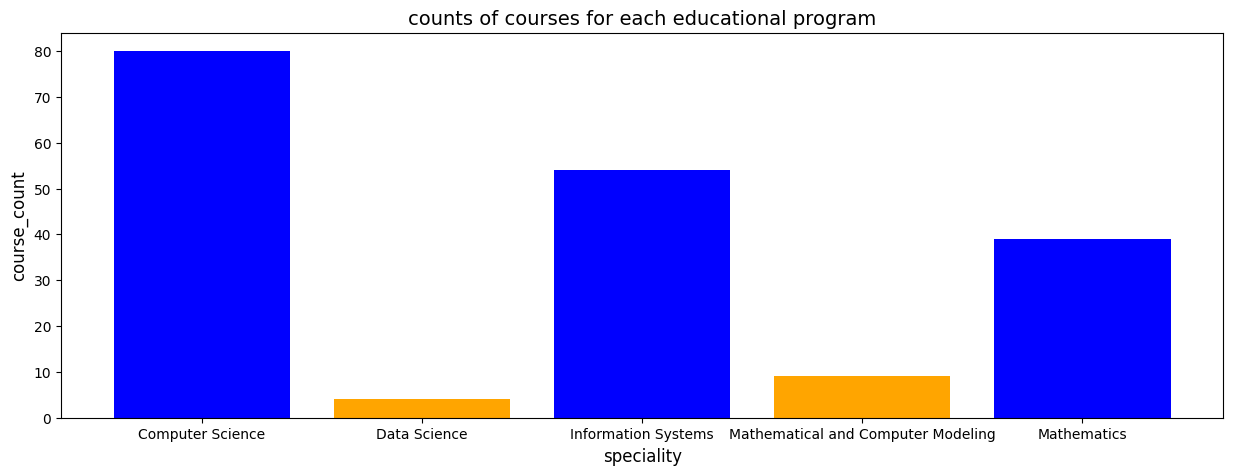

In [136]:
plt.figure(figsize=(15, 5))
plt.bar(edu['SPECIALITY'], edu['COURSE_COUNT'], color=['blue', 'orange'])


plt.xlabel('speciality', fontsize=12)
plt.ylabel('course_count', fontsize=12)
plt.title('counts of courses for each educational program', fontsize=14)

plt.show()


### 4. Use Development Index file for this task.
Solve a classification problem to classify countries by Development Index (response). 

Use KNN classifier in this task
Select only 3 columns (features)

In [137]:
dev_index = pd.read_csv("Development Index.csv")
dev_index.head()

,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


In [138]:
dev_index.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density ', 'GDP ($ per capita)',
       'Literacy (%)', 'Infant mortality ', 'Development Index'],
      dtype='object')

In [167]:
X = dev_index.drop(columns=['Infant mortality ', 'Development Index', 'Population', 'Area (sq. mi.)'])
y = dev_index['Development Index']

In [168]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [178]:
clf = KNeighborsClassifier(n_neighbors = 9) 
clf.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

In [179]:
y_pred = clf.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7058823529411765


### 5. Answer for the following questions with your own words
1. Give the description for Hadoop HDFS architecture
2. What is MapReduce? How it works? Where it can be used?
3. Why partitioning required in Hive?

In [3]:
%clear